In [52]:
import sys
sys.path.append("../src/utils")
from utils import read_raw_network_data
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
data, _ = read_raw_network_data("T0932", depth=1)

In [54]:
data.keys()

dict_keys(['lines_static_data', 'nodes_static_data', 'SMM_measurements', 'TP_measurements'])

In [55]:
# data_nodes = data["nodes_static_data"].drop(columns=["Unnamed: 0"])
# data_edges = data["lines_static_data"].drop(columns=["Unnamed: 0"])
# data_ts_mm = data["SMM_measurements"].drop(columns=["Unnamed: 0"])
# data_ts_tp = data["TP_measurements"].drop(columns=["Unnamed: 0"])

In [56]:
data_nodes = data["nodes_static_data"]
data_edges = data["lines_static_data"]
data_ts_mm = data["SMM_measurements"]
data_ts_tp = data["TP_measurements"]

In [57]:
data_nodes.head()

,aclass_id,bus,smm,prikljucna_moc_odjem,prikljucna_moc_oddaja,x_y,lon_lat
0,PMO,41738,621.0,106.0,0.0,"(520377.6124, 152418.53989999928)","(21.356558989288665, 49.239700987517935)"
1,PMO,41741,428.0,11.0,0.0,"(520372.1928000003, 152432.88020000048)","(21.356487210870704, 49.23982960733534)"
2,PMO,41741,11096.0,17.0,0.0,"(520372.1928000003, 152432.88020000048)","(21.356487210870704, 49.23982960733534)"
3,PMO,41743,11105.0,17.0,0.0,"(520370.7619000003, 152408.88990000077)","(21.35647118129004, 49.23961366944986)"
4,PMO,41743,11106.0,6.0,0.0,"(520370.7619000003, 152408.88990000077)","(21.35647118129004, 49.23961366944986)"


In [58]:
data_edges.head()

,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,max_i_ka,type,d_mm2,coords,coords_transformed
0,2207,2209,0.028,1.380000,0.087000,0.101,cs,16.0,"[[520363.74340000004, 152457.42080000043], [52...","[[21.35637507471823, 49.240049774948375], [21...."
1,41765,41785,0.030,2.233433,0.094233,0.079,cs,10.0,"[[520363.92260000017, 152433.57049999945], [52...","[[21.356379907269215, 49.2398352141254], [21.3..."
2,2171,41776,0.065,0.568000,0.075000,0.203,cs,70.0,"[[520360.6617999999, 152411.01019999944], [520...","[[21.35634000136821, 49.239632007925344], [21...."
3,41272,41743,0.046,0.358000,0.077000,0.213,cs,95.0,"[[520365.0005999999, 152373.01960000023], [520...","[[21.35640025423092, 49.23929053472161], [21.3..."
4,41272,41755,0.036,0.533000,0.079000,0.176,cs,70.0,"[[520365.0005999999, 152373.01960000023], [520...","[[21.35640025423092, 49.23929053472161], [21.3..."


In [59]:
# print bus that are not unique from data_nodes 
data_nodes[data_nodes.duplicated(subset=["bus"], keep=False)].head()

,aclass_id,bus,smm,prikljucna_moc_odjem,prikljucna_moc_oddaja,x_y,lon_lat
1,PMO,41741,428.0,11.0,0.0,"(520372.1928000003, 152432.88020000048)","(21.356487210870704, 49.23982960733534)"
2,PMO,41741,11096.0,17.0,0.0,"(520372.1928000003, 152432.88020000048)","(21.356487210870704, 49.23982960733534)"
3,PMO,41743,11105.0,17.0,0.0,"(520370.7619000003, 152408.88990000077)","(21.35647118129004, 49.23961366944986)"
4,PMO,41743,11106.0,6.0,0.0,"(520370.7619000003, 152408.88990000077)","(21.35647118129004, 49.23961366944986)"
5,PMO,41744,87046.0,24.0,0.0,"(520370.29339999985, 152454.36060000025)","(21.356460323909765, 49.24002272134694)"


In [60]:
#each bus can have multiple smms so we have to agregate data for each bus

In [61]:
data_nodes_aggr = data_nodes.groupby(["bus", "aclass_id"]).agg(list)
data_nodes_aggr["x_y"] = data_nodes_aggr["x_y"].apply(lambda x: x[0])
data_nodes_aggr["lon_lat"] = data_nodes_aggr["lon_lat"].apply(lambda x: x[0])
data_nodes_aggr = data_nodes_aggr.reset_index()
data_nodes_aggr[20:25]

,bus,aclass_id,smm,prikljucna_moc_odjem,prikljucna_moc_oddaja,x_y,lon_lat
20,41297,PMO,[603.0],[35.0],[0.0],"(520320.1480999999, 152324.9201999996)","(21.35582376906718, 49.23885452367699)"
21,41298,PMO,"[11151.0, 11149.0, 11150.0]","[17.0, 17.0, 17.0]","[0.0, 0.0, 0.0]","(520316.43709999975, 152299.5998999998)","(21.355778319358087, 49.23862645348593)"
22,41738,PMO,[621.0],[106.0],[0.0],"(520377.6124, 152418.53989999928)","(21.356558989288665, 49.239700987517935)"
23,41741,PMO,"[428.0, 11096.0]","[11.0, 17.0]","[0.0, 0.0]","(520372.1928000003, 152432.88020000048)","(21.356487210870704, 49.23982960733534)"
24,41743,PMO,"[11105.0, 11106.0]","[17.0, 6.0]","[0.0, 0.0]","(520370.7619000003, 152408.88990000077)","(21.35647118129004, 49.23961366944986)"


In [62]:
print(len(data_nodes_aggr))
print(len(data_nodes_aggr["bus"].unique()))
#print distinct nodes from data eges columns from_bus and to_bus
print(len(set(data_edges["from_bus"].unique().tolist() + data_edges["to_bus"].unique().tolist())))

60
60
60


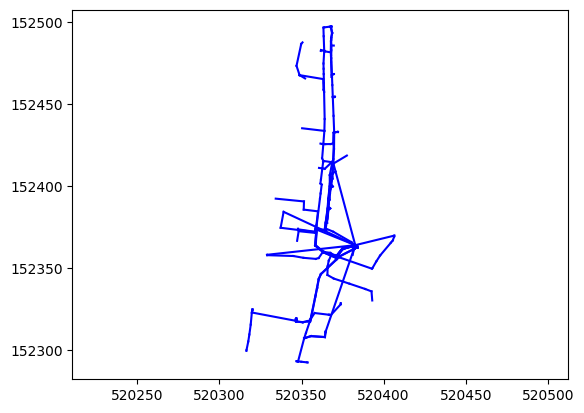

In [63]:
for row in data_edges.iterrows():
    coords = row[1]["coords"]
    #transform string to list of tuples
    coords = eval(coords)
    for i in range(len(coords)-1):
        x0, y0 = coords[i]
        x1, y1 = coords[i+1]
        plt.plot([x0, x1], [y0, y1], "b")
#show plot with equal axis dimensions
plt.axis("equal")
plt.show()

In [64]:
data_nodes_aggr_dict = data_nodes_aggr.set_index("bus").to_dict(orient="index")
data_nodes_aggr_dict

{445: {'aclass_id': 'TR',
  'smm': [nan],
  'prikljucna_moc_odjem': [nan],
  'prikljucna_moc_oddaja': [nan],
  'x_y': '(520382.7308, 152363.97890000045)',
  'lon_lat': '(21.35663109152071, 49.23921049220127)'},
 2171: {'aclass_id': 'RO',
  'smm': [nan],
  'prikljucna_moc_odjem': [nan],
  'prikljucna_moc_oddaja': [nan],
  'x_y': '(520358.67059999984, 152374.78979999945)',
  'lon_lat': '(21.35631799434757, 49.239305998608415)'},
 2172: {'aclass_id': 'RO',
  'smm': [nan],
  'prikljucna_moc_odjem': [nan],
  'prikljucna_moc_oddaja': [nan],
  'x_y': '(520358.5504999999, 152373.9098000005)',
  'lon_lat': '(21.356316529734652, 49.239298072747516)'},
 2203: {'aclass_id': 'RO',
  'smm': [nan],
  'prikljucna_moc_odjem': [nan],
  'prikljucna_moc_oddaja': [nan],
  'x_y': '(520370.45210000034, 152414.26999999955)',
  'lon_lat': '(21.3564665985539, 49.23966204996808)'},
 2204: {'aclass_id': 'RO',
  'smm': [nan],
  'prikljucna_moc_odjem': [nan],
  'prikljucna_moc_oddaja': [nan],
  'x_y': '(520369.3221

In [65]:
#create undirected networkx graph from data_nodes and data_edges
G = nx.from_pandas_edgelist(data_edges, source="from_bus", target="to_bus", edge_attr=True)
#set node attributes from data_nodes_aggr_dict
nx.set_node_attributes(G, data_nodes_aggr_dict)


In [66]:
G.nodes(data=True)

NodeDataView({2207: {'aclass_id': 'RO', 'smm': [nan], 'prikljucna_moc_odjem': [nan], 'prikljucna_moc_oddaja': [nan], 'x_y': '(520363.74340000004, 152457.42080000043)', 'lon_lat': '(21.35637507471823, 49.240049774948375)'}, 2209: {'aclass_id': 'RO', 'smm': [nan], 'prikljucna_moc_odjem': [nan], 'prikljucna_moc_oddaja': [nan], 'x_y': '(520348.8132999996, 152467.51139999926)', 'lon_lat': '(21.356180429191987, 49.24013946701276)'}, 41765: {'aclass_id': 'PMO', 'smm': [556.0, 90245.0, 11098.0], 'prikljucna_moc_odjem': [14.0, 6.0, 17.0], 'prikljucna_moc_oddaja': [0.0, 0.0, 0.0], 'x_y': '(520363.92260000017, 152433.57049999945)', 'lon_lat': '(21.356379907269215, 49.2398352141254)'}, 41785: {'aclass_id': 'PMO', 'smm': [nan], 'prikljucna_moc_odjem': [nan], 'prikljucna_moc_oddaja': [nan], 'x_y': '(520350.3822999997, 152435.16090000048)', 'lon_lat': '(21.356204177077743, 49.239848533967375)'}, 2171: {'aclass_id': 'RO', 'smm': [nan], 'prikljucna_moc_odjem': [nan], 'prikljucna_moc_oddaja': [nan], 'x_

In [67]:
G.edges(data=True)

EdgeDataView([(2207, 2209, {'length_km': 0.028000000864267, 'r_ohm_per_km': 1.379999995231628, 'x_ohm_per_km': 0.086999997496605, 'max_i_ka': 0.101000003516674, 'type': 'cs', 'd_mm2': 16.0, 'coords': '[[520363.74340000004, 152457.42080000043], [520363.3833999997, 152458.67090000026], [520363.22360000014, 152465.11099999957], [520348.8409000002, 152467.50679999962], [520348.8132999996, 152467.51139999926]]', 'coords_transformed': '[[21.35637507471823, 49.240049774948375], [21.356370275446004, 49.24006099543962], [21.35636752596756, 49.24011892339651], [21.35618078753822, 49.24013942764325], [21.356180429191987, 49.24013946701276]]'}), (2207, 41765, {'length_km': 0.028000000864267, 'r_ohm_per_km': 0.77099996805191, 'x_ohm_per_km': 0.081000000238419, 'max_i_ka': 0.14300000667572, 'type': 'cs', 'd_mm2': 50.0, 'coords': '[[520363.92260000017, 152433.57049999945], [520364.09279999975, 152440.80059999973], [520363.74340000004, 152457.42080000043]]', 'coords_transformed': '[[21.356379907269215

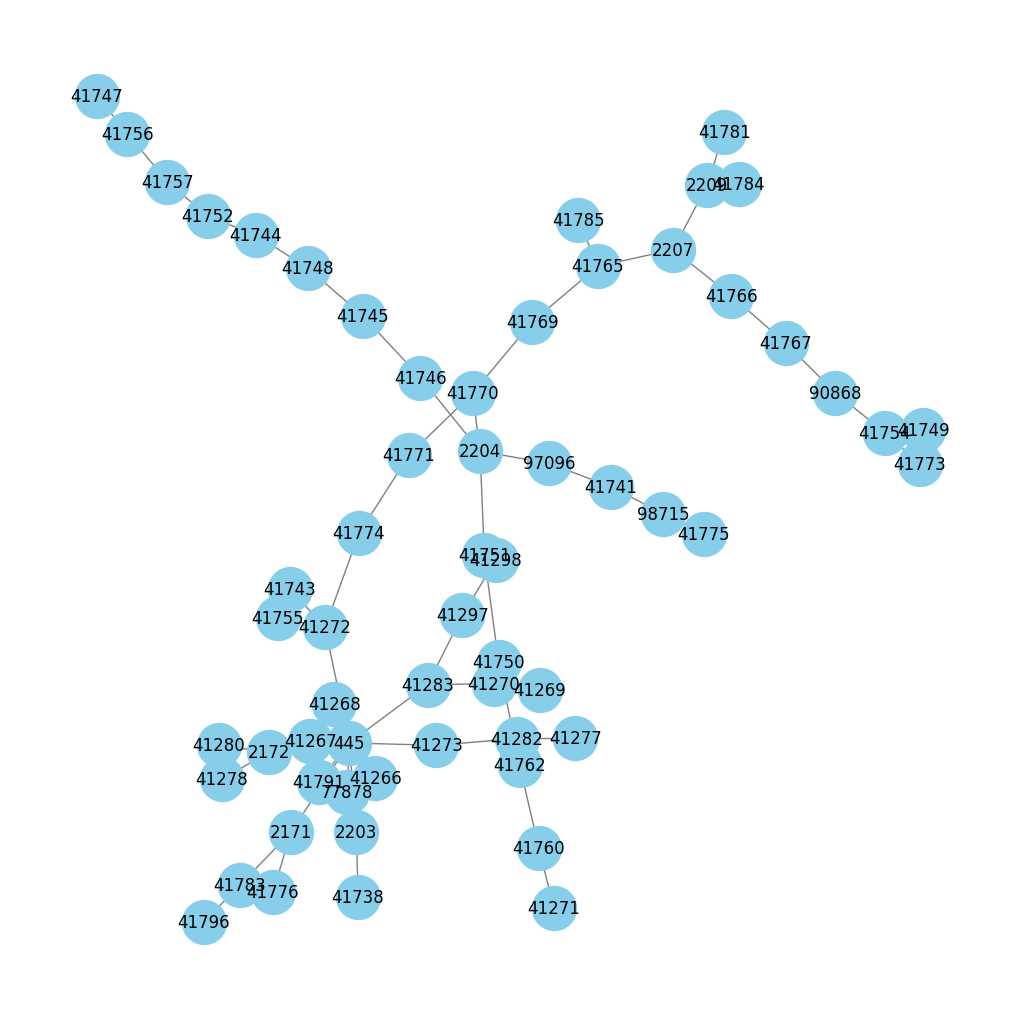

In [68]:
#plot the network

plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", edge_color="grey")
plt.show()


In [69]:
#--------------------------------------- UP TO HERE WORKS FINE ---------------------------------------#

In [70]:
ts_unique = data_ts_mm["SMM"].unique()
nodes_unique = data_nodes["smm"].unique()
print(len(ts_unique))
print(len(nodes_unique))
print("--------------------")
for i in nodes_unique:
    if i not in ts_unique:
        print(i)
print("--------------------")
print(data_nodes.loc[data_nodes["aclass_id"] == "TR"])

128
129
--------------------
nan
--------------------
    aclass_id  bus  smm  prikljucna_moc_odjem  prikljucna_moc_oddaja  \
149        TR  445  NaN                   NaN                    NaN   

                                   x_y                                 lon_lat  
149  (520382.7308, 152363.97890000045)  (21.35663109152071, 49.23921049220127)  


In [72]:
import netgraph as ng
from netgraph import Graph

In [73]:
edge_coords = [((s, e), attrs["coords"]) for s, e, attrs in G.edges(data=True)] 
edge_list = [edge for edge, _ in edge_coords]
edge_paths = dict(edge_coords)
node_positions = nx.get_node_attributes(G, "x_y")

In [74]:
len(node_positions)

60

TypeError: unsupported operand type(s) for -: 'str' and 'str'

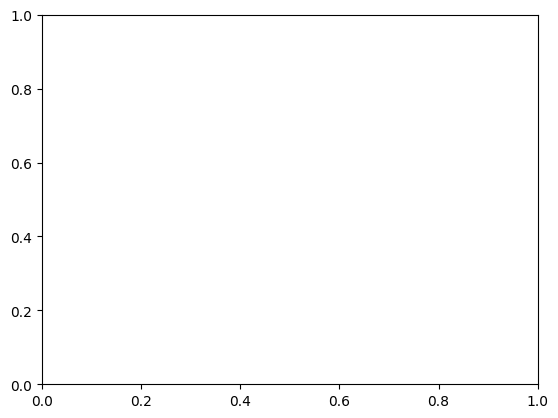

In [75]:
Graph(edge_list, node_layout=node_positions, edge_layout=edge_paths)
plt.show()